#Question
#Take suitable vectors in $\mathbb{R}^2$ and $\mathbb{R}^3$ and find
1. dot product
2. Norm of vector
3. Distance
4. check for orthogonality between two vectors
5. Angles between two vectors
6. cross product between two vectors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sy
import plotly.graph_objects as go

sy.init_printing()

# <font face="gotham" color="purple"> The Dot Product</font>

Consider two vectors

$$
\mathbf{u}=\left[\begin{array}{l}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right] \quad \text { and } \bf{v}=\left[\begin{array}{l}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]
$$

The dot product of $\mathbf{u}$ and $\mathbf{v}$, i.e. $\mathbf{u}\cdot\mathbf{v}$ is defined as

$$
\left[\begin{array}{llll}
u_{1} & u_{2} & \cdots & u_{n}
\end{array}\right]\left[\begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array}\right]=u_{1} v_{1}+u_{2} v_{2}+\cdots+u_{n} v_{n}
$$

We can generate two random vectors, then let's compare operations in NumPy.

In [2]:
u = np.round(100*np.random.randn(10))
v = np.round(100*np.random.randn(10))

In [3]:
u*v # this is element-wise multiplication

array([-10725.,   2223.,   3510.,  -9845., -85581.,   1840.,  -4070.,
        -8586.,  -3248.,  14210.])

In [4]:
u@v # matrix multiplication, which is a dot product in this case

-100272.0

In [5]:
np.inner(u,v) # inner product here is the same as matrix multiplication

-100272.0

# <font face="gotham" color="purple"> The Norm of a Vector</font>

The _norm_ is the length of a vector, defined by

$$
\|\mathbf{v}\| = \sqrt{\mathbf{v} \cdot \mathbf{v}} = \sqrt{v_{1}^{2} + v_{2}^{2} + \cdots + v_{n}^{2}}, \quad \text{and} \quad \|\mathbf{v}\|^{2} = \mathbf{v} \cdot \mathbf{v}
$$

The NumPy built-in function `np.linalg.norm()` is used for computing norms. By default, it computes the length of vectors from the origin.

In [6]:
a = [2, 6]
np.linalg.norm(a)

6.324555320336759

Verify the results.

In [7]:
np.sqrt(2**2 + 6**2)

6.324555320336759

This function can also compute a group of vectors' length, for instance $(2, 6)^T$, $(8, 2)^T$, $(9, 1)^T$

In [8]:
A = np.array([[2, 8, 9],
              [6, 2, 1]])
np.linalg.norm(A, axis = 0)

array([6.32455532, 8.24621125, 9.05538514])

# <font face="gotham" color="purple"> Distance in $\mathbb{R}^n$</font>

For $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^{n}$, the distance between $\mathbf{u}$ and $\mathbf{v},$ written as dist $(\mathbf{u}, \mathbf{v}),$ is the length of the vector $\mathbf{u}-\mathbf{v} .$ That is,

$$
\operatorname{dist}(\mathbf{u}, \mathbf{v})=\|\mathbf{u}-\mathbf{v}\|
$$

Suppose we have two vectors $\mathbf{u} = (2, 9)$ and $\mathbf{v} = (-3, 4)$, compute the distance and visualize the results.

In [9]:
u = np.array([2, 9])
v = np.array([-3, 4])
np.linalg.norm(u - v)

7.0710678118654755

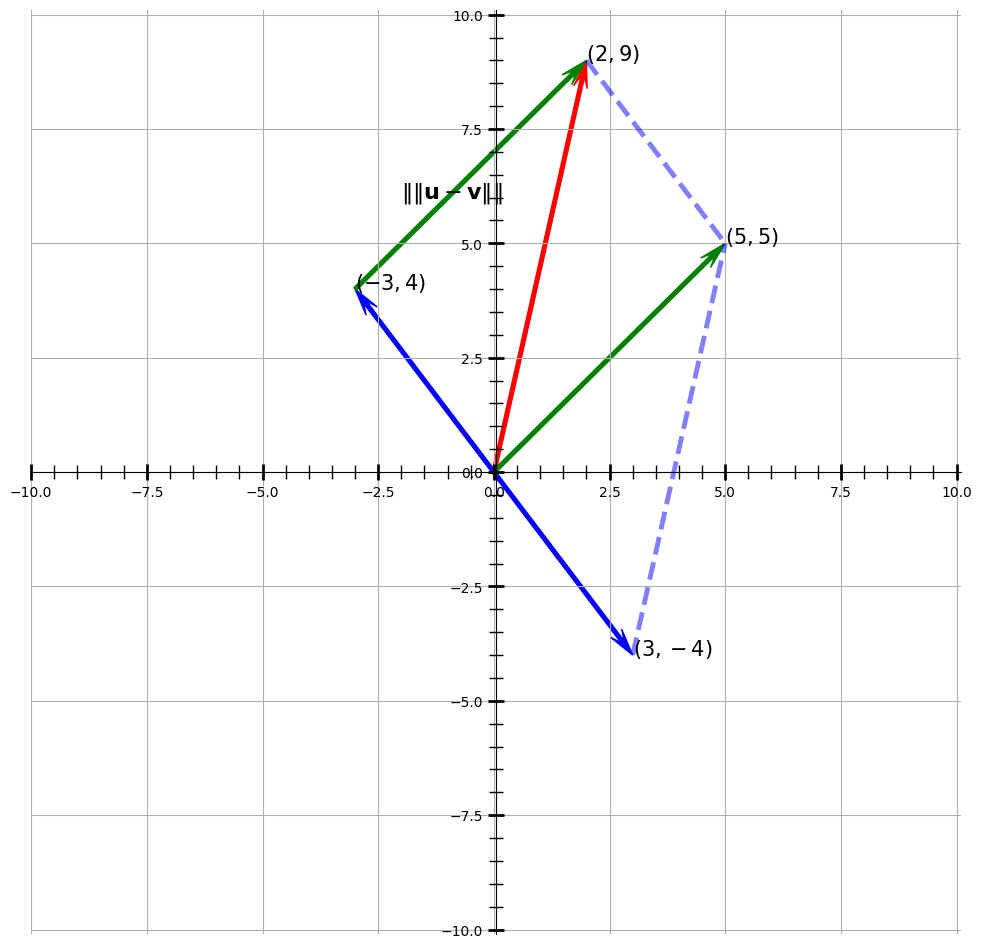

In [10]:

fig, ax = plt.subplots(figsize=(12, 12))

# Define the vectors
vects = np.array([[2, 9], [-3, 4], [3, -4], [5, 5]])
col = ['red', 'blue', 'blue', 'green']
cordt = ['$(2, 9)$', '$(-3, 4)$', '$(3, -4)$', '$(5, 5)$']

# Plot the vectors
for i in range(4):
    ax.arrow(0, 0, vects[i, 0], vects[i, 1], color=col[i], width=0.08,
             length_includes_head=True,
             head_width=0.3,  # default: 3*width
             head_length=0.6,
             overhang=0.4)
    ax.text(x=vects[i][0], y=vects[i][1], s=cordt[i], size=15)
ax.grid()

# Define the points for the arrows and lines
points = np.array([[2, 9], [5, 5], [3, -4], [-3, 4]])

# Plot the green vector from (-3, 4) to (2, 9)
start_point = points[3]
end_point = points[0]
direction = end_point - start_point
ax.arrow(start_point[0], start_point[1], direction[0], direction[1], color='green', width=0.08,
         length_includes_head=True,
         head_width=0.3,  # default: 3*width
         head_length=0.6,
         overhang=0.4)

# Plot the blue dashed lines
line1 = np.array([points[0], points[1]])
ax.plot(line1[:, 0], line1[:, 1], c='b', lw=3.5, alpha=0.5, ls='--')

line2 = np.array([points[2], points[1]])
ax.plot(line2[:, 0], line2[:, 1], c='b', lw=3.5, alpha=0.5, ls='--')

# Add the text for the distance using raw string
ax.text(-2, 6, r'$\|\|\mathbf{u}-\mathbf{v}\|\|$', size=16)

###################### Axis, Spines, Ticks ##########################
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis='both', direction='inout', length=12, width=2, which='major')
ax.tick_params(axis='both', direction='inout', length=10, width=1, which='minor')

plt.show()


From the graph, we know that the $\|\mathbf{u}-\mathbf{v}\|$ is $\sqrt{5^2 + 5^2}$.

In [11]:
np.sqrt(5**2 + 5**2)

7.0710678118654755

The same results as the ```np.linalg.norm(u - v)```.

# <font face="gotham" color="purple"> Orthogonal Vectors</font>

We have two vectors $\mathbf{u}$ and $\mathbf{v}$, and square the distance of $\|\mathbf{u}+\mathbf{v}\|$ and $\|\mathbf{u}-\mathbf{v}\|$

$$\begin{aligned}
\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} &=\|\mathbf{u}-(-\mathbf{v})\|^{2}=\|\mathbf{u}+\mathbf{v}\|^{2} \\
&=(\mathbf{u}+\mathbf{v}) \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot(\mathbf{u}+\mathbf{v})+\mathbf{v} \cdot(\mathbf{u}+\mathbf{v}) \\
&=\mathbf{u} \cdot \mathbf{u}+\mathbf{u} \cdot \mathbf{v}+\mathbf{v} \cdot \mathbf{u}+\mathbf{v} \cdot \mathbf{v} \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}+2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

$$\begin{aligned}
\big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2} &=\|\mathbf{u}\|^{2}+\|-\mathbf{v}\|^{2}+2 \mathbf{u} \cdot(-\mathbf{v}) \\
&=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2 \mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

Suppose $\mathbf{u} = (1, 4)$ and $\mathbf{v} = (-2, 2)$, visualize the vector and distances.

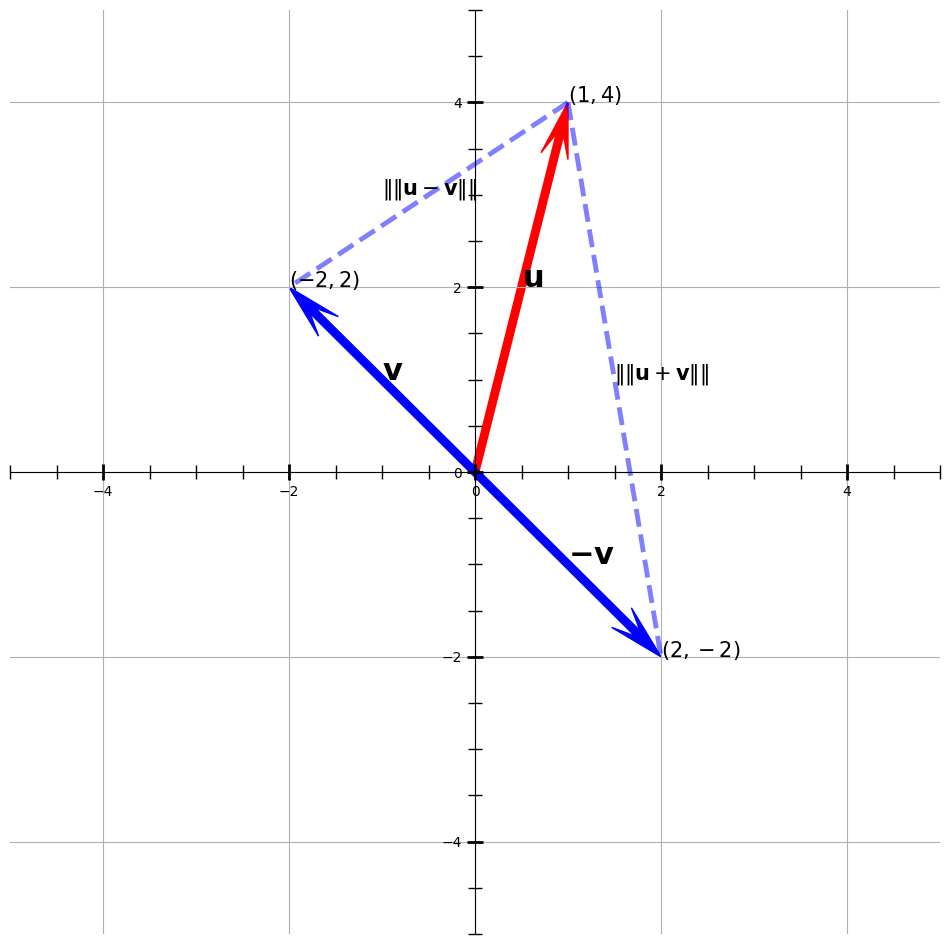

In [12]:

fig, ax = plt.subplots(figsize=(12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2]])
colr = ['red', 'blue', 'blue']
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$']
vec_name = [r'$\mathbf{u}$', r'$\mathbf{v}$', r'$\mathbf{-v}$']

for i in range(3):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color=colr[i], width=0.08,
             length_includes_head=True,
             head_width=0.3,  # default: 3*width
             head_length=0.6,
             overhang=0.4)
    ax.text(x=vects[i][0], y=vects[i][1], s=cordt[i], size=15)
    ax.text(x=vects[i][0]/2, y=vects[i][1]/2, s=vec_name[i], size=22)

ax.text(x=-1, y=3, s=r'$\|\|\mathbf{u}-\mathbf{v}\|\|$', size=15)
ax.text(x=1.5, y=1, s=r'$\|\|\mathbf{u}+\mathbf{v}\|\|$', size=15)

############################### Dashed Line #######################
line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:, 0], line1[:, 1], c='b', lw=3.5, alpha=0.5, ls='--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:, 0], line2[:, 1], c='b', lw=3.5, alpha=0.5, ls='--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis='both', direction='inout', length=12, width=2, which='major')
ax.tick_params(axis='both', direction='inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

plt.show()


Note that if $\big[\operatorname{dist}(\mathbf{u},-\mathbf{v})\big]^{2} = \big[\operatorname{dist}(\mathbf{u}, \mathbf{v})\big]^{2}$, $\mathbf{u}$ and $\mathbf{v}$ are orthogonal.According to equations above, it must be

$$\mathbf{u} \cdot \mathbf{v} = 0$$

This is one of the most important conclusion in linear algebra.

Suppose there is another vector $w = (2.5, 2.5)$, let's plot over the graph again.

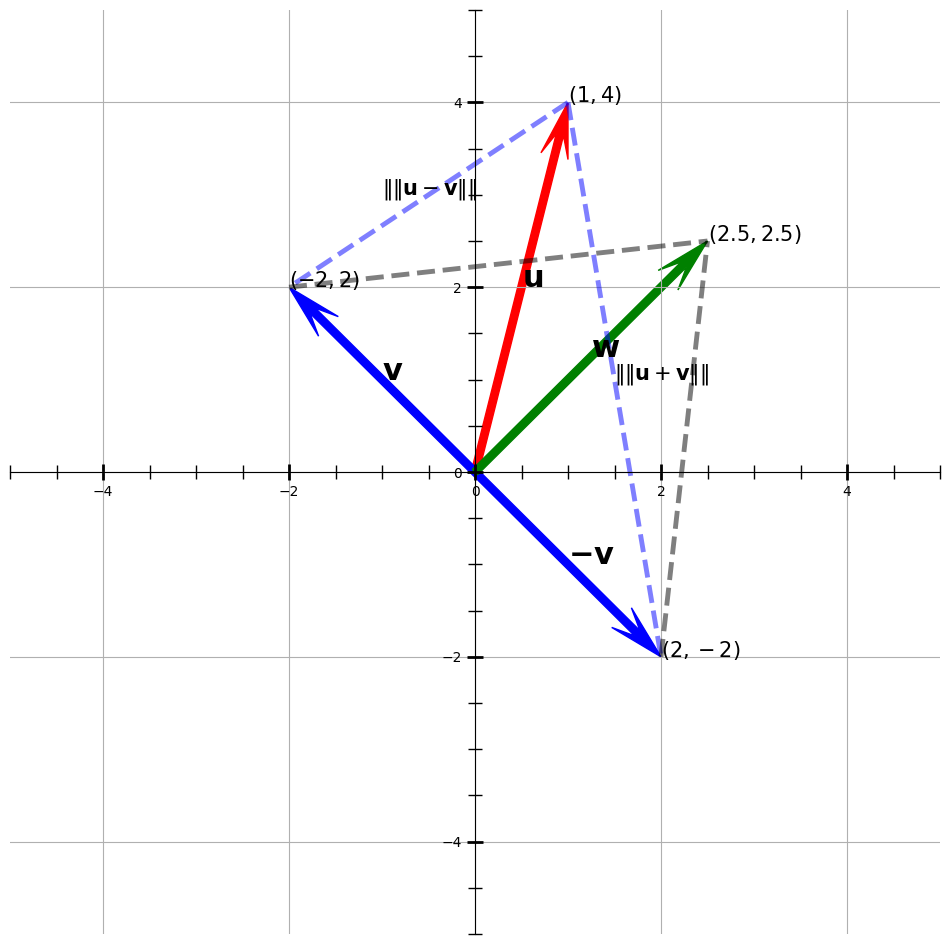

In [ ]:

fig, ax = plt.subplots(figsize=(12, 12))

vects = np.array([[1, 4], [-2, 2], [2, -2], [2.5, 2.5]])
colr = ['red', 'blue', 'blue', 'green']
cordt = ['$(1, 4)$', '$(-2, 2)$', '$(2, -2)$', '$(2.5, 2.5)$']
vec_name = [r'$\mathbf{u}$', r'$\mathbf{v}$', r'$\mathbf{-v}$', r'$\mathbf{w}$']

for i in range(4):
    ax.arrow(0, 0, vects[i][0], vects[i][1], color=colr[i], width=0.08,
             length_includes_head=True,
             head_width=0.3,  # default: 3*width
             head_length=0.6,
             overhang=0.4)
    ax.text(x=vects[i][0], y=vects[i][1], s=cordt[i], size=15)
    ax.text(x=vects[i][0]/2, y=vects[i][1]/2, s=vec_name[i], size=22)

ax.text(x=-1, y=3, s=r'$\|\|\mathbf{u}-\mathbf{v}\|\|$', size=15)
ax.text(x=1.5, y=1, s=r'$\|\|\mathbf{u}+\mathbf{v}\|\|$', size=15)

############################### Dashed Line #######################

line1 = np.array([vects[0], vects[1]])
ax.plot(line1[:, 0], line1[:, 1], c='b', lw=3.5, alpha=0.5, ls='--')

line2 = np.array([vects[0], vects[2]])
ax.plot(line2[:, 0], line2[:, 1], c='b', lw=3.5, alpha=0.5, ls='--')

line3 = np.array([vects[1], vects[3]])
ax.plot(line3[:, 0], line3[:, 1], c='k', lw=3.5, alpha=0.5, ls='--')

line4 = np.array([vects[2], vects[3]])
ax.plot(line4[:, 0], line4[:, 1], c='k', lw=3.5, alpha=0.5, ls='--')

###################### Axis, Spines, Ticks ##########################
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis='both', direction='inout', length=12, width=2, which='major')
ax.tick_params(axis='both', direction='inout', length=10, width=1, which='minor')

ax.axis([-5, 5, -5, 5])
ax.grid()

plt.show()


Use SciPy built-in function, construct two $2\times 2$ matrices for holding head and tail coordinates of the vector.

In [ ]:
a = np.array([[1, 4], [-2, 2]])
b = np.array([[1, 4], [2, -2]])

In [ ]:
distance = sp.spatial.distance.pdist(a, 'euclidean'); distance

array([3.60555128])

In [ ]:
distance = sp.spatial.distance.pdist(b, 'euclidean');distance

array([6.08276253])

Verify by NumPy ```.norm```.

In [ ]:
def dist(u, v):
    a = np.linalg.norm(u - v)
    return a

In [ ]:
u = np.array([1, 4])
v = np.array([-2, 2])
dist(u, v)

In [ ]:
u = np.array([1, 4])
v = np.array([2, -2])
dist(u, v)

Now Let's test if vector $(2.5, 2.5)^T$ is perpendicular to $(2, -2)^T$ and $(-2, 2)^T$.

In [ ]:
a = np.array([[2.5, 2.5], [-2, 2]])
b = np.array([[2.5, 2.5], [2, -2]])
distance1 = sp.spatial.distance.pdist(a, 'euclidean')
distance2 = sp.spatial.distance.pdist(b, 'euclidean')

In [ ]:
print(distance1, distance2)

[4.52769257] [4.52769257]


They are the same length, which means $\mathbf{w}\perp \mathbf{v}$ and $\mathbf{w}\perp \mathbf{-v}$.

# <font face="gotham" color="purple"> Angles in $\mathbb{R}^n$</font>

Here is the formula of calculating angles in vector space, to derive it we need the law of cosine:

$$\|\mathbf{u}-\mathbf{v}\|^{2}=\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-2\|\mathbf{u}\|\|\mathbf{v}\| \cos \vartheta$$

Rearrange, we get

$$\begin{aligned}
\|\mathbf{u}\|\|\mathbf{v}\| \cos \vartheta &=\frac{1}{2}\left[\|\mathbf{u}\|^{2}+\|\mathbf{v}\|^{2}-\|\mathbf{u}-\mathbf{v}\|^{2}\right] \\
&=\frac{1}{2}\left[u_{1}^{2}+u_{2}^{2}+v_{1}^{2}+v_{2}^{2}-\left(u_{1}-v_{1}\right)^{2}-\left(u_{2}-v_{2}\right)^{2}\right] \\
&=u_{1} v_{1}+u_{2} v_{2} \\
&=\mathbf{u} \cdot \mathbf{v}
\end{aligned}$$

In statistics, $\cos{\vartheta}$ is called _correlation coefficient_.

$$
\cos{\vartheta}=\frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|\|\mathbf{v}\|}
$$

## <font face="gotham" color="purple"> Geometric Interpretation of Dot Product</font>

You may have noticed that the terms *dot product* and *inner product* are sometimes used interchangeably. However, they have distinct meanings.

Functions and polynomials can also have an inner product, but we typically use the term dot product to refer to the inner product within vector spaces.

The dot product has an interesting geometric interpretation. Consider two vectors, $\mathbf{a}$ and $\mathbf{u}$, pointing in different directions, with an angle $\vartheta$ between them. Suppose $\mathbf{u}$ is a unit vector. We want to determine how much $\mathbf{a}$ is aligned with the direction of $\mathbf{u}$.

This value can be calculated by projecting $\mathbf{a}$ onto $\mathbf{u}$:

$$
 \|\mathbf{a}\|\cos{\vartheta} = \|\mathbf{a}\| \|\mathbf{u}\|\cos{\vartheta} = \mathbf{a} \cdot \mathbf{u}
$$

Any vector $\mathbf{b}$ can be normalized to a unit vector $\mathbf{u}$. By performing the calculation above, we can determine how much $\mathbf{b}$ is aligned with the direction of $\mathbf{u}$.

# <font face="gotham" color="purple"> Orthogonal Sets</font>

If a set of vectors $S = \left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ in $\mathbb{R}^{n}$ has any arbitrary pair to be orthogonal, i.e. $\mathbf{u}_{i} \cdot \mathbf{u}_{j}=0$ whenever $i \neq j$, $S =\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$ is called an _orthogonal set_.

Naturally, orthogonal set $S$ is linearly independent, they are also an _orthogonal basis_ for space spanned by $\left\{\mathbf{u}_{1}, \ldots, \mathbf{u}_{p}\right\}$. Orthogonal basis has an advantage is that coordinates of the basis can be quickly computed.

For instance any $\mathbf{y}$ in $W$,

$$
\mathbf{y}=c_{1} \mathbf{u}_{1}+\cdots+c_{p} \mathbf{u}_{p}
$$

Because it is an orthogonal sets,

$$
\mathbf{y} \cdot \mathbf{u}_{1}=\left(c_{1} \mathbf{u}_{1}+c_{2} \mathbf{u}_{2}+\cdots+c_{p} \mathbf{u}_{p}\right) \cdot \mathbf{u}_{1}=c_{1}\left(\mathbf{u}_{1} \cdot \mathbf{u}_{1}\right)
$$

Thus

$$c_{j}=\frac{\mathbf{y} \cdot \mathbf{u}_{j}}{\mathbf{u}_{j} \cdot \mathbf{u}_{j}} \quad(j=1, \ldots, p)$$

# <font face="gotham" color="purple">Cross Product</font>

This is the formula of Cross product
$$
\mathbf{a} \times \mathbf{b}=\|\mathbf{a}\|\|\mathbf{b}\| \sin (\theta) \mathbf{n}
$$
The output of cross product is the length of vector $\mathbf{c}$ which is perpendicular to both $\mathbf{a} $ and $\mathbf{b} $.

In [13]:

# Define the two vectors
a = np.array([5, 2, 3])
b = np.array([4, 8, 10])

# Calculate the cross product
c = np.cross(a, b)

# Create the 3D plot
fig = go.Figure(data=[
    go.Scatter3d(x=[0, a[0]], y=[0, a[1]], z=[0, a[2]], mode='lines', name='Vector a', line=dict(color='red', width=5)),
    go.Scatter3d(x=[0, b[0]], y=[0, b[1]], z=[0, b[2]], mode='lines', name='Vector b', line=dict(color='green', width=5)),
    go.Scatter3d(x=[0, c[0]], y=[0, c[1]], z=[0, c[2]], mode='lines', name='Vector c (cross product)', line=dict(color='blue', width=5))
])

# Set the axis labels
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Show the plot
fig.show()
